# Chapter 3
# Data formats and handling
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

The package pandas is a free software library for Python including the following functions:
- Data manipulation and analysis
- DataFrame objects and Series
- Export and import data from files and web
- Handling of missing data

Provides high-performance data structures and data analysis tools.

## Section 3.1
## Pandas package

### Motivation

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%%**********************]  5 of 5 completed


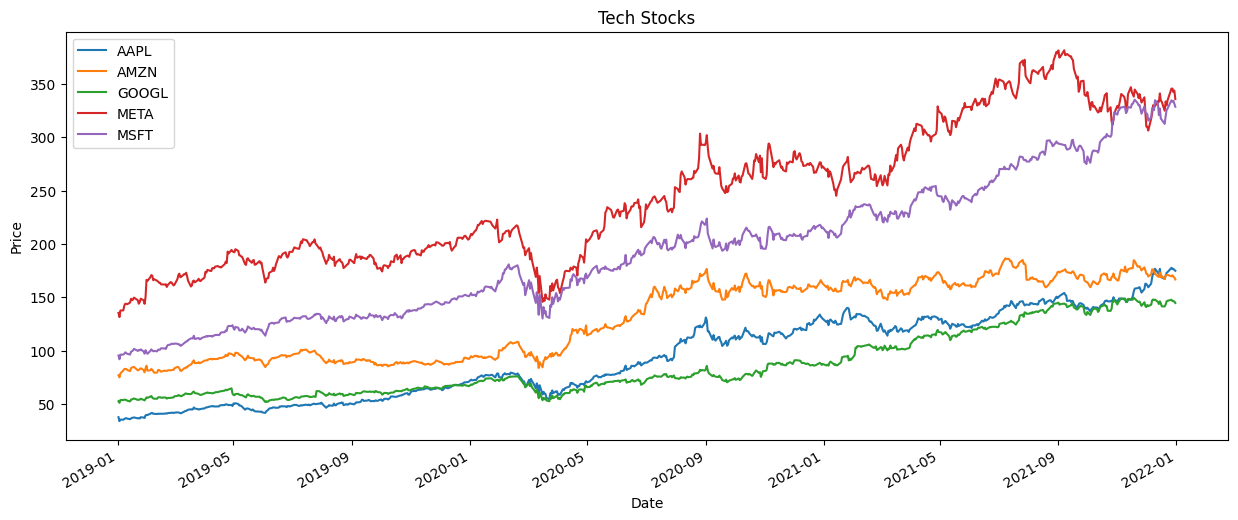

In [23]:
# Download data
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
data = yf.download(tickers, start="2019-01-01", end="2022-01-01")
close = data["Adj Close"]

# Plot the data
close.plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tech Stocks")
plt.legend()

# Save the figure
plt.savefig("out/tech_stocks.pdf", format="pdf")

Calculando o retorno diario

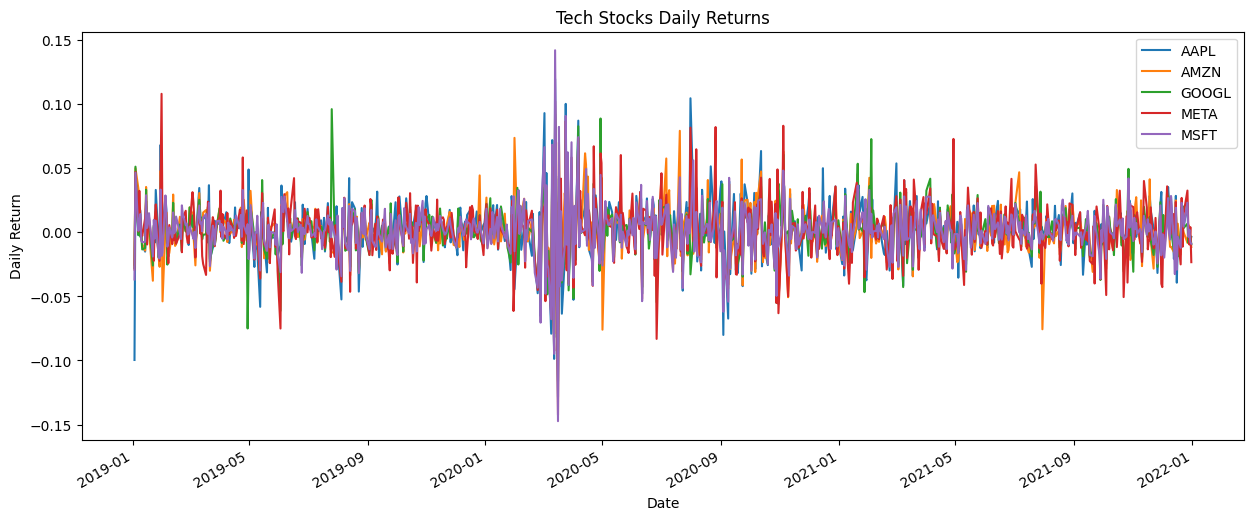

In [25]:
retorno_diario = close.pct_change()

retorno_diario.plot(figsize=(15, 6))

plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Tech Stocks Daily Returns")
plt.legend()

# Show the plot
plt.show()


Podemos visualizar isso separadamente

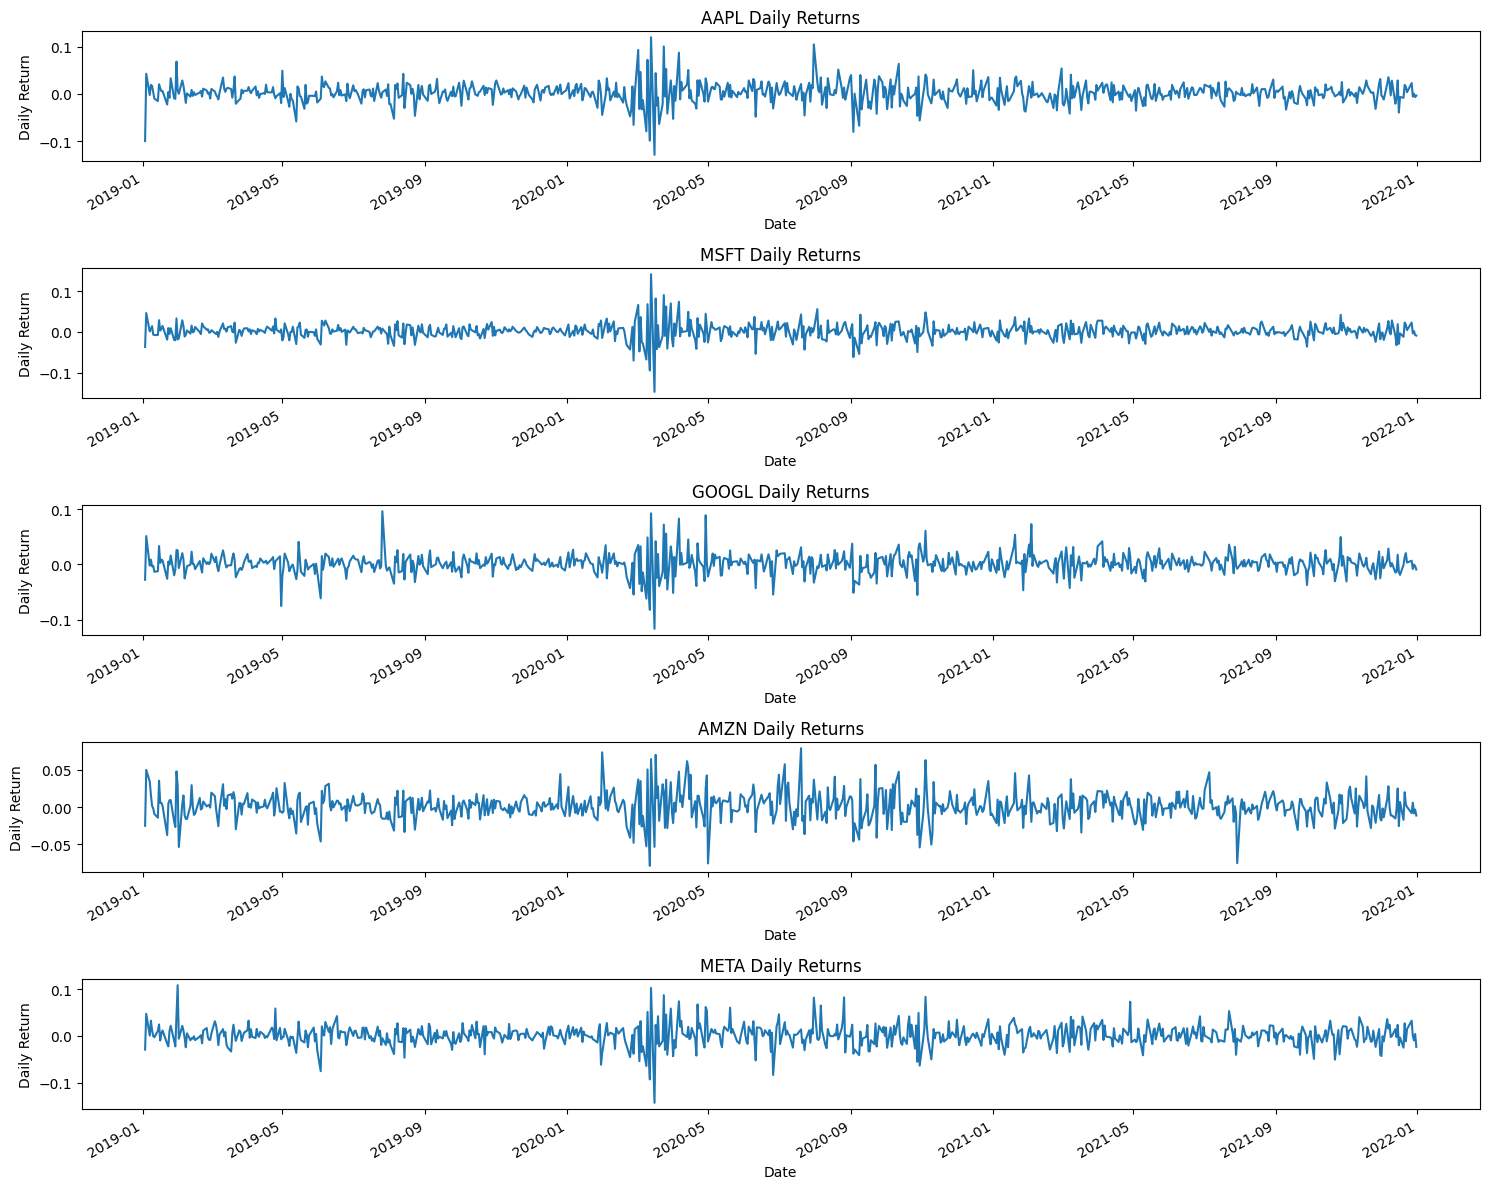

In [28]:
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(15, 12))

# Plot each stock's daily returns in a separate subplot
for i, ticker in enumerate(tickers):
    retorno_diario[ticker].plot(ax=axes[i])
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Daily Return")
    axes[i].set_title(f"{ticker} Daily Returns")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Podemos calcular o retorno total de cada ação desse intervalo na seguinte forma

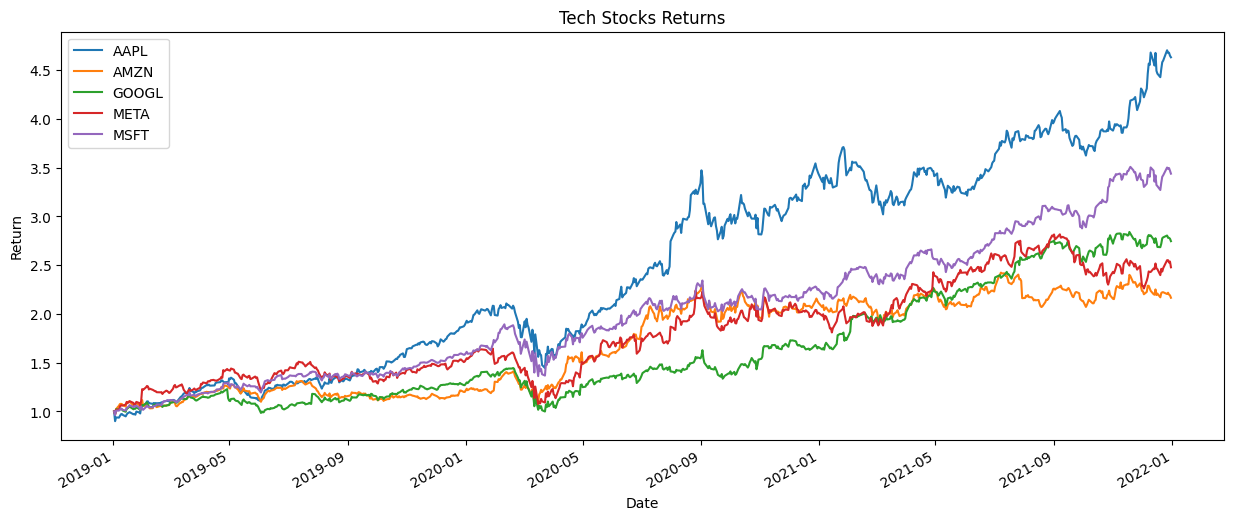

In [26]:
retorno = close/close.iloc[0]

retorno.plot(figsize=(15, 6))

plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Tech Stocks Returns")
plt.legend()

# Show the plot
plt.show()

## Section 3.2
## DataFrame

### Creating a DataFrame

In [ ]:
data = {"company": ["Daimler", "E.ON", "Siemens", "BASF", "BMW"],
        "price": [69.2, 8.11, 110.92, 87.28, 87.81],
        "volume": [4456290, 3667975, 3669487, 1778058, 1824582]}
frame = pd.DataFrame(data)
frame

### Print DataFrame

In [ ]:
frame2 = pd.DataFrame(data, columns=["company", "volume",
                                     "price", "change"])
frame2

### Add data to DataFrame

In [ ]:
frame2["change"] = [1.2, -3.2, 0.4, -0.12, 2.4]
frame2["change"]

### Indexing DataFrames

In [ ]:
frame2[["company", "change"]]

### DataFrame delete column

In [ ]:
del frame2["volume"]
frame2


In [ ]:
frame2.columns

### Naming properties

In [ ]:
frame2.index.name = "number:"
frame2.columns.name = "feature:"
frame2

### Reindexing

In [ ]:
frame3 = frame.reindex([0, 2, 3, 4])
frame3

### Filling missing values

In [ ]:
frame4 = frame.reindex(index=[0, 2, 3, 4, 5], fill_value=0,
                       columns=["company", "price", "market cap"])
frame4
frame4 = frame.reindex(index=[0, 2, 3, 4], fill_value=np.nan,
                       columns=["company", "price", "market cap"])
frame4

### Filling NaN

In [ ]:
frame4[:3]
frame4.fillna(1000000, inplace=True)
frame4[:3]

### Dropping index

In [ ]:
frame5 = frame
frame5
frame5.drop([1, 2])

### Dropping column

In [ ]:
frame5[:2]

In [ ]:
frame5.drop("price", axis=1)[:3]

In [ ]:
frame5.drop(2, axis=0)

### Indexing

In [ ]:
frame

In [ ]:
frame[2:]

### Indexing

In [ ]:
frame6 = pd.DataFrame(data, index=["a", "b", "c", "d", "e"])
frame6

In [ ]:
frame6["b":"d"]

### Selection with loc and iloc

In [ ]:
frame6.loc["c", ["company", "price"]]
frame6.iloc[2, [0, 1]]

### Selection with loc and iloc

In [ ]:
frame6.loc[["c", "d", "e"], ["volume", "price", "company"]]

In [ ]:
frame6.iloc[2:, ::-1]

### Multiindex

In [ ]:
ind = [["a", "a", "a", "b", "b"], [1, 2, 3, 1, 2]]
frame6 = pd.DataFrame(np.arange(15).reshape((5, 3)), index=ind,
                      columns=["first", "second", "third"])
frame6

In [ ]:
frame6.index.names = ["index1", "index2"]
frame6.index

### Selecting of a multiindex

In [ ]:
frame6.loc["a"]


In [ ]:
frame6.loc["b", 1]

### Series and DataFrames

In [ ]:
frame7 = frame[["price", "volume"]]
frame7.index = ["Daimler", "E.ON", "Siemens", "BASF", "BMW"]
series = frame7.iloc[2]
frame7

In [ ]:
series

### Operations between Series and DataFrames down the rows

In [ ]:
frame7 + series

### Pandas vs Numpy

In [ ]:
nparr = np.arange(12.).reshape((3, 4))
row = nparr[0]
nparr - row

### Numpy functions on DataFrames

In [ ]:
frame7[:2]

In [ ]:
frame7.apply(np.mean)

In [ ]:
frame7.apply(np.sqrt)[:2]

### Groupby

In [ ]:
vote = pd.read_csv("data/vote.csv")[["Party", "Member", "Vote"]]
vote.head()

### Groupby

In [ ]:
res = vote.groupby(["Party", "Vote"]).count()
res

## Section 3.4
## Import/Export data

### Read comma-separated values

In [ ]:
df = pd.read_csv("data/ex1.csv")
df

### Read table values

In [ ]:
df = pd.read_table("data/tab.txt", sep="|")
df

### Read CSV and header settings

In [ ]:
df = pd.read_csv("data/ex2.csv", header=None)
df

### Read CSV and header names

In [ ]:
df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"])
df

### Read CSV and specify index

In [ ]:
df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"],
                 index_col="hello")
df

### Read CSV and choose rows

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df

### Write to CSV

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("out/out1.csv")

### Write to CSV and settings

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("out/out2.csv", index=False, header=False)

### Write to CSV and specify header

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3, 4])
df.to_csv("out/out3.csv", index=False,
          header=["a", "b", "c", "d", "e"])

### Reading Excel

In [ ]:
xls_frame = pd.read_excel("data/goog.xls")

### Excel as a DataFrame

In [ ]:
xls_frame[["Adj Close", "Volume", "High"]]

### Import pandas-datareader

In [ ]:
from pandas_datareader import data

### Get data of Ford

In [ ]:
ford = data.DataReader("F", "yahoo", "2020-01-01", "2020-01-31")
ford.head()[["Close", "Volume"]]

### Explore Ford dataset

In [ ]:
ford.index
ford.loc["2020-01-28"]

### Download and explore SAP data

In [ ]:
sap = data.DataReader("SAP", "yahoo", "2020-01-01", "2020-06-30")
sap[25:27]
sap.loc["2020-03-09"]

### Eurostat

In [ ]:
population = data.DataReader("tps00001", "eurostat", "2010-01-01",
                             "2020-01-01")
population.columns
population["Population on 1 January - total", "France"][-5:]

### Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup
import requests
url = "www.uni-goettingen.de/de/applied-econometrics/412565.html"
r = requests.get("https://" + url)
d = r.text
soup = BeautifulSoup(d, "lxml")
soup.title

### Bollinger

In [ ]:
sap = data.DataReader("SAP", "yahoo", "2019-01-01", "2020-08-31")
sap.index = pd.to_datetime(sap.index)
boll = sap["Close"].rolling(window=20, center=False).mean()
std = sap["Close"].rolling(window=20, center=False).std()
upp = boll + std * 2
low = boll - std * 2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
boll.plot(ax=ax, label="20 days Rolling mean")
upp.plot(ax=ax, label="Upper Band")
low.plot(ax=ax, label="Lower Band")
sap["Close"].plot(ax=ax, label="SAP Price")
ax.legend(loc="best")
fig.savefig("out/boll.pdf")